In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('sample_data/music_genre.csv', sep=",")
data.dropna(inplace=True)
data['tempo'] = data['tempo'].replace("?", 120.0)
data = data.drop('obtained_date', axis=1)
data = data.drop('instance_id', axis=1)

In [ ]:
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['artist_name'] = label_encoder.fit_transform(data['artist_name'])
data['track_name'] = label_encoder.fit_transform(data['track_name'])
data['key'] = label_encoder.fit_transform(data['key'])
data['mode'] = label_encoder.fit_transform(data['mode'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  int64  
 1   track_name        50000 non-null  int64  
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  int64  
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  int64  
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  valence           50000 non-null  float64
 15  music_genre       50000 non-null  object 
dtypes: float64(10), int64(4), object(2)
memory us

In [ ]:
data['music_genre'].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 40000
Test size: 10000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

X_train = train.drop('music_genre', axis=1)
y_train = train['music_genre']
X_test = test.drop('music_genre', axis=1)
y_test = test['music_genre']

In [ ]:
# Обучение логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_logistic = logistic_model.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_decision = tree.predict(X_test)

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy of Logistic Regression: {accuracy_logistic}')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM: {accuracy_svm}')

accuracy = accuracy_score(y_test, y_pred_decision)
print("Accuracy:", accuracy)

Accuracy of Logistic Regression: 0.1268
Accuracy of SVM: 0.1554
Accuracy: 0.4467


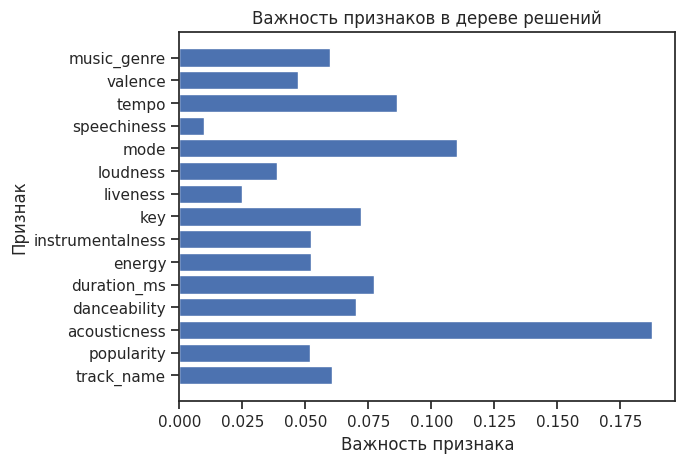

In [ ]:
plt.barh(range(X_test.shape[1]), tree.feature_importances_, align='center')
plt.yticks(range(X_test.shape[1]), list(data)[1:16])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в дереве решений')
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0280651 to fit



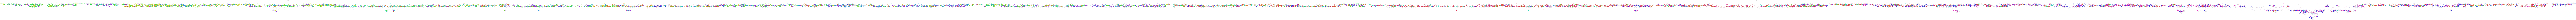

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=list(data)[1:16],
                           class_names=data['music_genre'].unique(), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

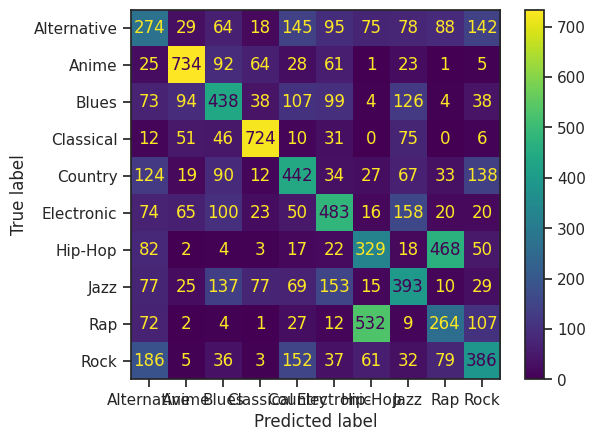

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_decision)